In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files
from sklearn.tree import DecisionTreeClassifier

In [18]:
import pandas as pd
from google.colab import files

uploaded = files.upload()  # Manually upload 'desicion tree.csv'
df = pd.read_csv("desicion tree.csv")


Saving desicion tree.csv to desicion tree (1).csv


In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       21 non-null     int64  
 1   sex       21 non-null     int64  
 2   cp        21 non-null     int64  
 3   trestbps  21 non-null     int64  
 4   chol      21 non-null     int64  
 5   fbs       21 non-null     int64  
 6   restecg   21 non-null     int64  
 7   thalach   21 non-null     int64  
 8   exang     21 non-null     int64  
 9   oldpeak   21 non-null     float64
 10  slope     21 non-null     int64  
 11  ca        21 non-null     int64  
 12  thal      21 non-null     int64  
 13  target    21 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 2.4 KB


In [21]:
null_counts = df.isnull().sum()
null_counts

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [22]:
df = df.dropna()

In [23]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,54.000000,0.761905,0.714286,132.571429,258.714286,0.142857,0.476190,150.000000,0.333333,1.247619,1.380952,0.523810,2.333333,0.428571
std,7.981228,0.436436,0.956183,15.177521,51.706037,0.358569,0.511766,22.821043,0.483046,1.018145,0.669043,0.813575,0.730297,0.507093
min,37.000000,0.000000,0.000000,112.000000,177.000000,0.000000,0.000000,109.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,50.000000,1.000000,0.000000,120.000000,230.000000,0.000000,0.000000,132.000000,0.000000,0.500000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,0.000000,130.000000,250.000000,0.000000,0.000000,153.000000,0.000000,1.200000,1.000000,0.000000,2.000000,0.000000
75%,60.000000,1.000000,1.000000,140.000000,290.000000,0.000000,1.000000,165.000000,1.000000,2.200000,2.000000,1.000000,3.000000,1.000000
max,65.000000,1.000000,3.000000,172.000000,354.000000,1.000000,1.000000,187.000000,1.000000,3.500000,2.000000,3.000000,3.000000,1.000000


In [24]:
X=df.drop('target',axis=1)
y=df['target']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
11,43,1,0,120,177,0,0,120,1,2.5,1,0,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
18,44,1,0,112,290,0,0,153,0,0.0,2,1,2
16,58,1,2,112,230,0,0,165,0,2.5,1,1,3


In [27]:
y_train.head()

,target
5,1
11,0
3,1
18,0
16,0


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       random_state=42)

In [29]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6

In [31]:
import pandas as pd

# Convert X_test to DataFrame with the same column names as X_train
X_test_df = pd.DataFrame(X_test, columns=X_train.columns)

# Now make predictions
predictions = model.predict(X_test_df)
print(predictions)


[1 1 1 1 1]


In [32]:
import pandas as pd

# Ensure column names match training data
columns = X_train.columns  # Use the same columns as training data

# Convert input into a DataFrame
input_data = pd.DataFrame([[55,1,0,132,353,0,1,132,1,1.2,1,1,3]], columns=columns)

# Predict using the model
prediction = model.predict(input_data)
print(prediction)


[0]


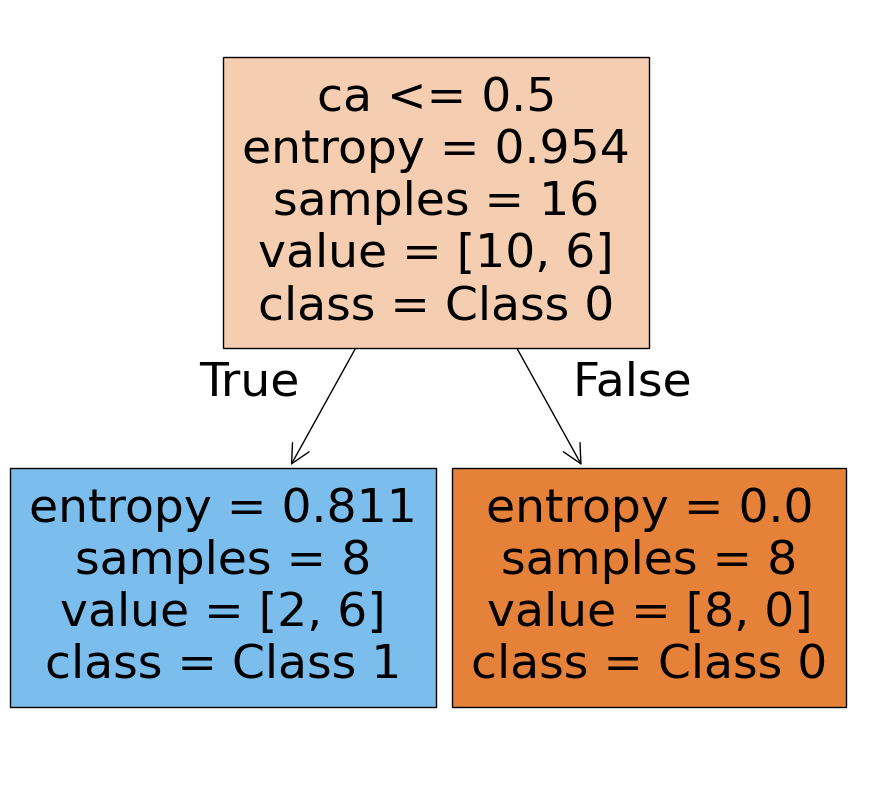

In [33]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 10))  # Adjust figure size for better readability
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.show()


Saving desicion tree.csv to desicion tree (2).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       21 non-null     int64  
 1   sex       21 non-null     int64  
 2   cp        21 non-null     int64  
 3   trestbps  21 non-null     int64  
 4   chol      21 non-null     int64  
 5   fbs       21 non-null     int64  
 6   restecg   21 non-null     int64  
 7   thalach   21 non-null     int64  
 8   exang     21 non-null     int64  
 9   oldpeak   21 non-null     float64
 10  slope     21 non-null     int64  
 11  ca        21 non-null     int64  
 12  thal      21 non-null     int64  
 13  target    21 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 2.4 KB
None
Accuracy: 0.6
Confusion Matrix:
 [[0 2]
 [0 3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


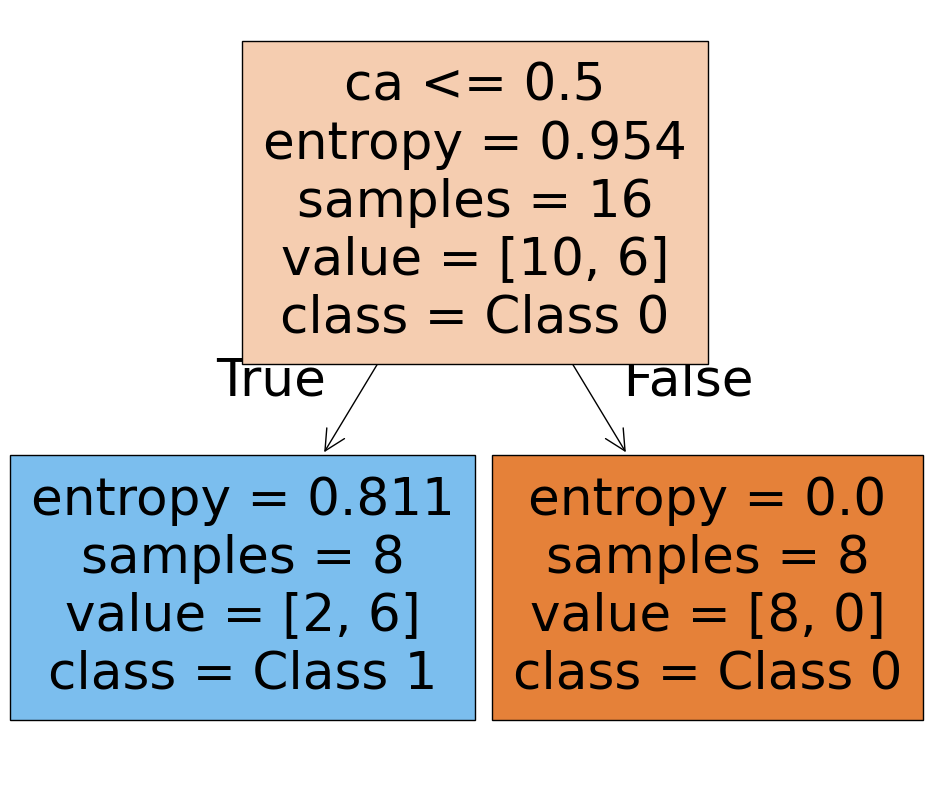

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
Tuned Accuracy: 0.6
Cross-Validated Accuracy: 0.67


In [34]:
# 📦 Imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from google.colab import files

# 📁 Upload and load data
uploaded = files.upload()
df = pd.read_csv("desicion tree.csv")

# 🧹 Data Cleaning
print(df.info())
df = df.dropna()  # or df.fillna(df.mean())

# 🔄 One-Hot Encoding for categorical features (if applicable)
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope'], drop_first=True)

# 🎯 Define features and target
X = df.drop('target', axis=1)
y = df['target']

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🌳 Initialize and Train Decision Tree with tuned parameters
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# 🔍 Make Predictions
y_pred = model.predict(X_test)

# ✅ Accuracy & Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 🌲 Visualize the Decision Tree
plt.figure(figsize=(12, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["Class 0", "Class 1"])
plt.show()

# 🧪 Optional: Grid Search for better accuracy
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, best_model.predict(X_test)))

# 🔁 Cross-validation for stability check
cv_score = cross_val_score(best_model, X, y, cv=5)
print("Cross-Validated Accuracy:", cv_score.mean())


Saving desicion tree.csv to desicion tree (2).csv
Shape after cleaning: (21, 14)

Target Distribution:
 target
0    12
1     9
Name: count, dtype: int64

Unique values in 'ca': [0 2 1 3]


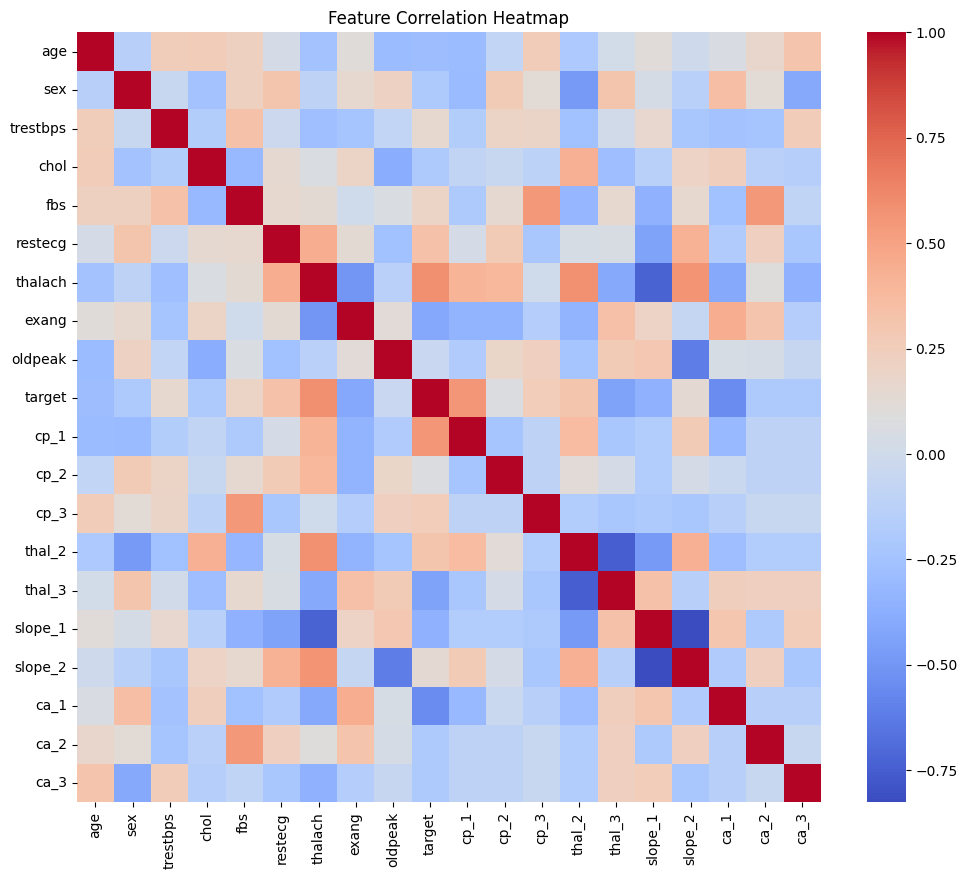


🔎 Basic Model Evaluation:
Accuracy: 0.6
Confusion Matrix:
 [[1 2]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         2

    accuracy                           0.60         5
   macro avg       0.75      0.67      0.58         5
weighted avg       0.80      0.60      0.57         5



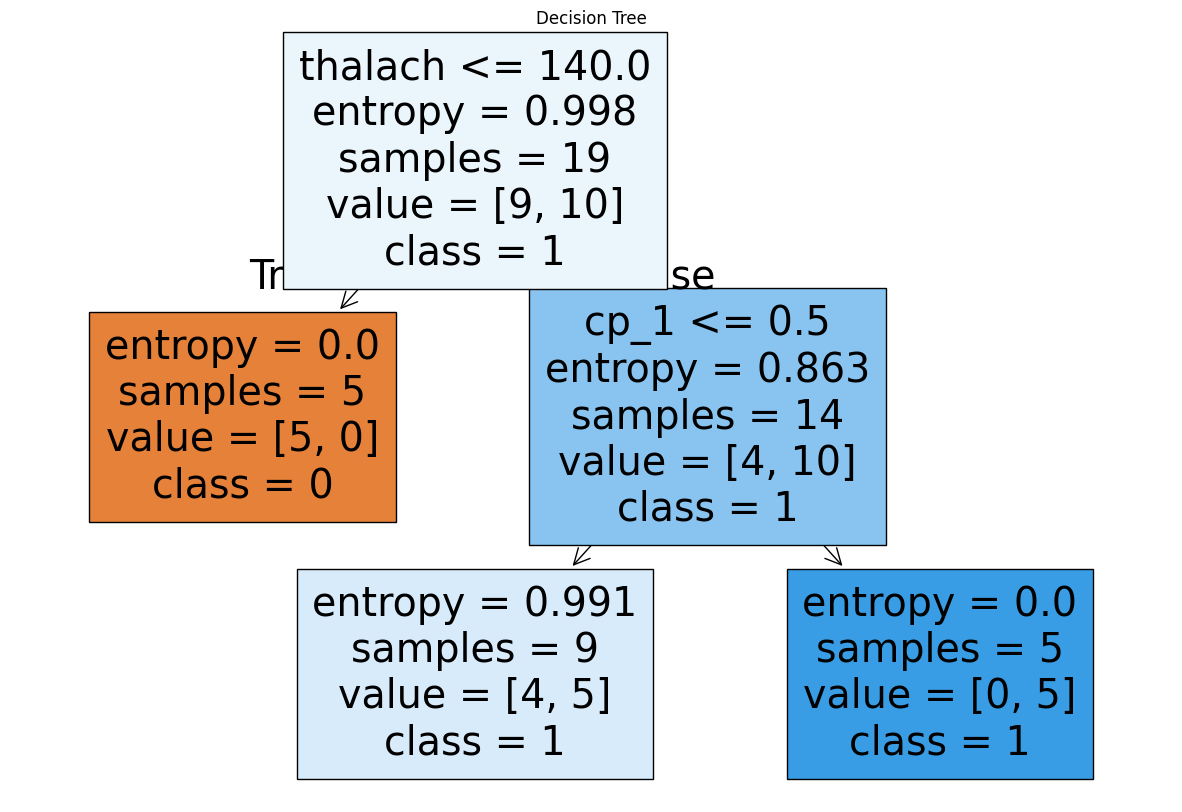


✅ Tuned Model Evaluation:
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
Tuned Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.33      0.50      0.40         2

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5

Cross-Validated Accuracy: 0.7100000000000001


In [ ]:
# 📦 Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from google.colab import files

# 📁 Upload dataset
uploaded = files.upload()
df = pd.read_csv("desicion tree.csv")

# 🧼 Data Cleaning
df = df.dropna()  # remove missing values
print("Shape after cleaning:", df.shape)

# 🧠 Class Distribution
print("\nTarget Distribution:\n", df['target'].value_counts())

# 🔍 Check unique values (for optional conversion)
print("\nUnique values in 'ca':", df['ca'].unique())
df['ca'] = df['ca'].astype(str)  # treat as categorical

# 🔄 One-hot encode categorical columns
df = pd.get_dummies(df, columns=['cp', 'thal', 'slope', 'ca'], drop_first=True)

# 🎯 Feature & Target Split
X = df.drop('target', axis=1)
y = df['target']

# ⚖️ Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 🔀 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# 🔥 Optional: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# 🌳 Train Basic Decision Tree
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

# 🧠 Predictions
y_pred = model.predict(X_test)

# 📊 Evaluation
print("\n🔎 Basic Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# 🌲 Tree Visualization
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=["0", "1"])
plt.title("Decision Tree")
plt.show()

# 🧪 Grid Search for Best Parameters
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

# 🎯 Final Model with Best Parameters
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("\n✅ Tuned Model Evaluation:")
print("Best Parameters:", grid.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, best_pred))
print("Classification Report:\n", classification_report(y_test, best_pred))

# 🔁 Cross-validation for general accuracy
cv_score = cross_val_score(best_model, X_resampled, y_resampled, cv=5)
print("Cross-Validated Accuracy:", cv_score.mean())
